In [1]:
!gdown '18Qhtw5YTo_niuKk54kuLiy1Hpchv3c-G'

Downloading...
From (original): https://drive.google.com/uc?id=18Qhtw5YTo_niuKk54kuLiy1Hpchv3c-G
From (redirected): https://drive.google.com/uc?id=18Qhtw5YTo_niuKk54kuLiy1Hpchv3c-G&confirm=t&uuid=c372c8b5-b131-4bcb-a7e6-43252501b604
To: /content/archive.zip
100% 614M/614M [00:19<00:00, 30.8MB/s]


In [2]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

# **Phase 1: Model Designing**

In [3]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Dataset Preprocessing

In [ ]:
# Paths and parameters
dataset_path = "raw-img"
batch_size = 32
img_size = 128  # Resize images to 128x128

# Transforms
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# Load dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split into train (70%), val (10%), test (20%)
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

# DataLoaders
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

print(f"Train: {len(train_set)}, Validation: {len(val_set)}, Test: {len(test_set)}")


Train: 18325, Validation: 2617, Test: 5237


CNN Model Design

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # Output: 32x128x128
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # Output: 64x64x64
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)                  # Downsample by 2
        self.fc1 = nn.Linear(64 * 32 * 32, 256)
        self.fc2 = nn.Linear(256, 10)  # 10 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()
print(model)


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


Training and Testing

Epoch 1/10, Loss: 1.7968, Accuracy: 37.63%
Epoch 2/10, Loss: 1.2472, Accuracy: 57.44%
Epoch 3/10, Loss: 0.8340, Accuracy: 72.08%
Epoch 4/10, Loss: 0.3688, Accuracy: 88.10%
Epoch 5/10, Loss: 0.1146, Accuracy: 96.73%
Epoch 6/10, Loss: 0.0480, Accuracy: 98.77%
Epoch 7/10, Loss: 0.0575, Accuracy: 98.35%
Epoch 8/10, Loss: 0.0417, Accuracy: 98.82%
Epoch 9/10, Loss: 0.0384, Accuracy: 98.79%
Epoch 10/10, Loss: 0.0425, Accuracy: 98.71%


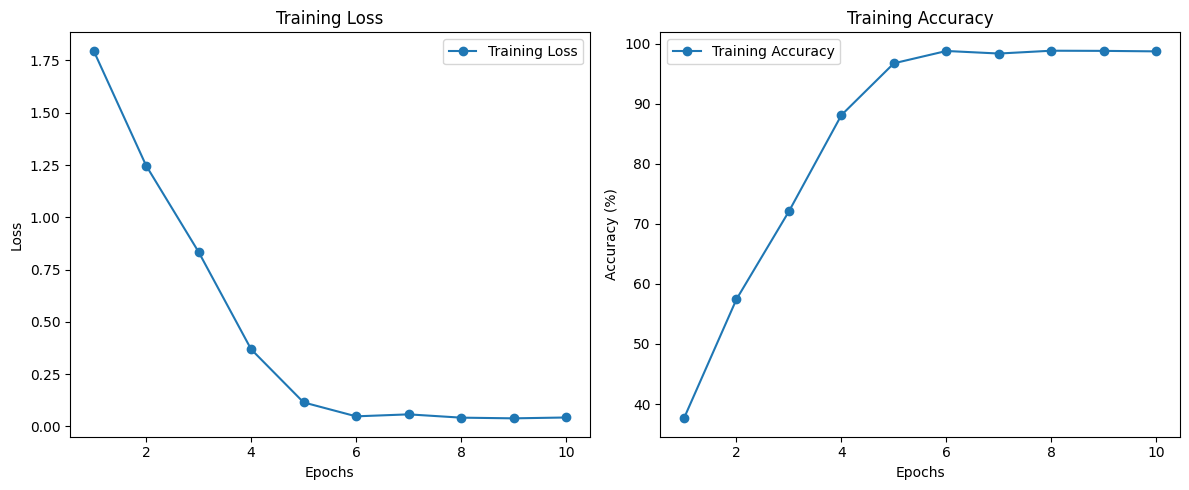

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Hyperparameters
learning_rate = 0.001
epochs = 10

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # Predictions and accuracy calculation
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate accuracy
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

# Plotting training loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Model Evaluation on Test Set

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate on the test set
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    return all_labels, all_preds

all_labels, all_preds = evaluate_model(model, test_loader)


Test Accuracy: 57.44%


Calculate Precision, Recall, and F1 Score



Classification Report:
              precision    recall  f1-score   support

        cane       0.48      0.63      0.54      1007
     cavallo       0.59      0.53      0.56       550
    elefante       0.54      0.56      0.55       309
    farfalla       0.75      0.68      0.71       396
     gallina       0.69      0.59      0.63       598
       gatto       0.38      0.36      0.37       330
       mucca       0.45      0.46      0.45       362
      pecora       0.48      0.38      0.42       353
       ragno       0.77      0.75      0.76       982
  scoiattolo       0.44      0.39      0.42       350

    accuracy                           0.57      5237
   macro avg       0.56      0.53      0.54      5237
weighted avg       0.58      0.57      0.58      5237



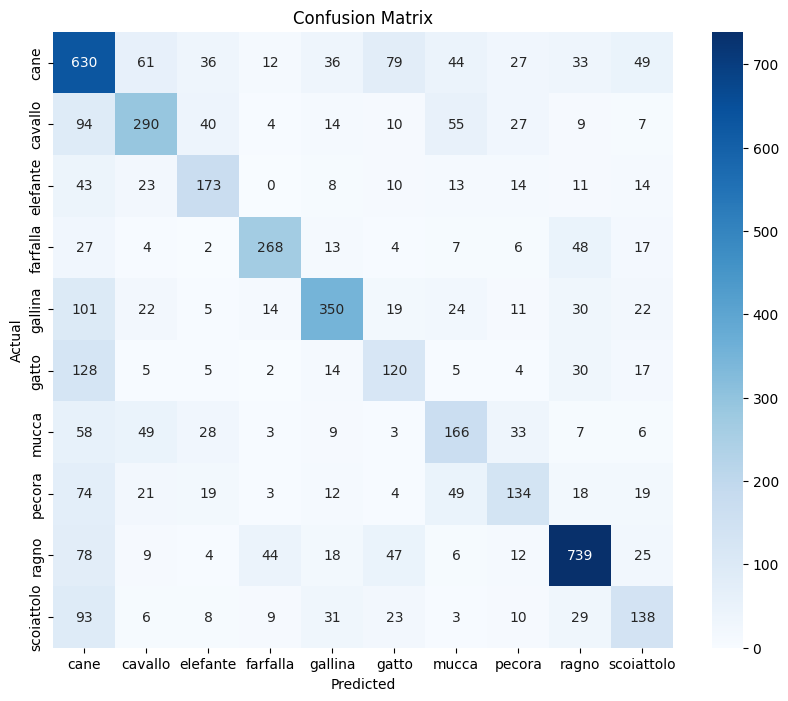

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
print("Classification Report:")
report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Visualize Test Predictions

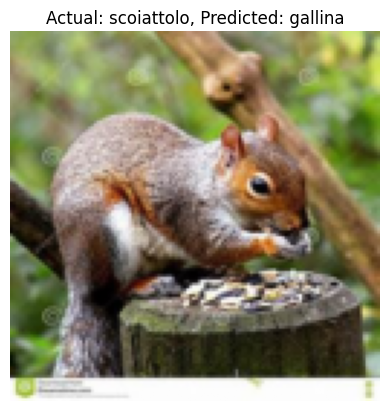

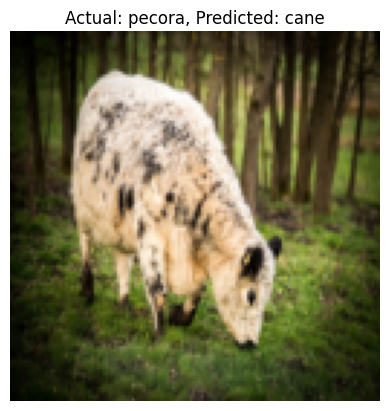

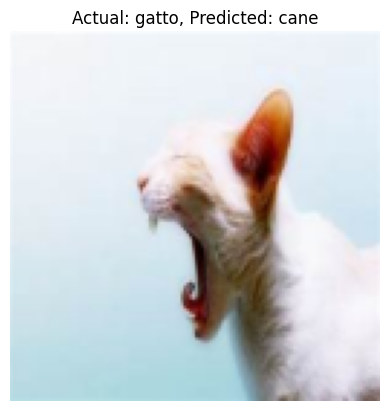

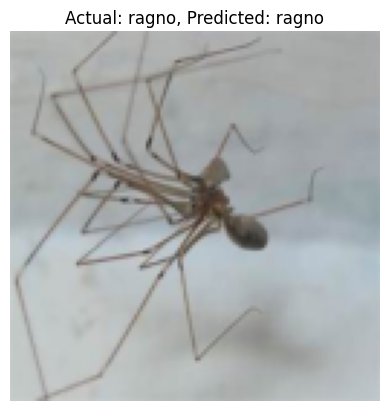

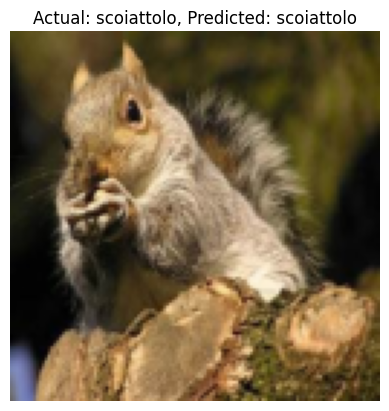

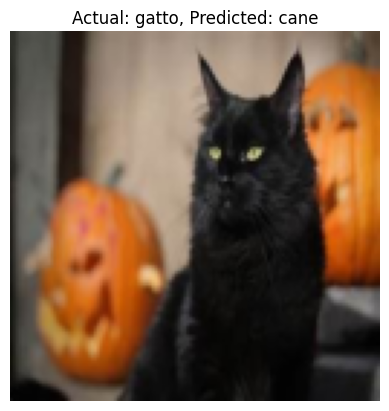

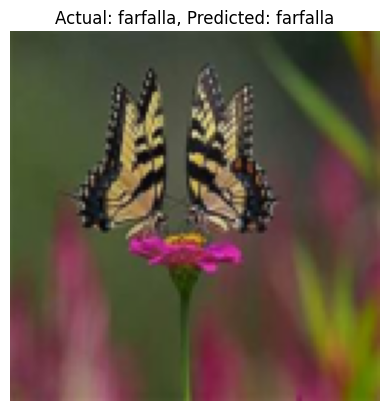

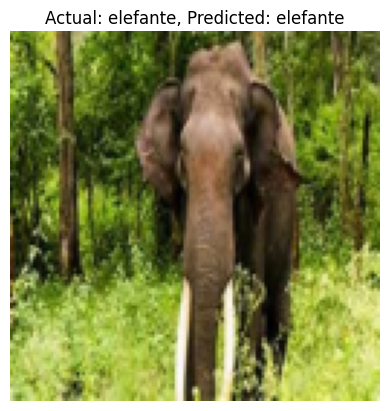

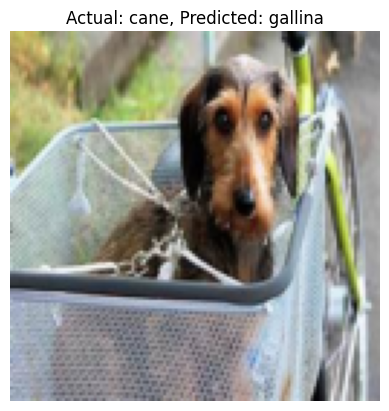

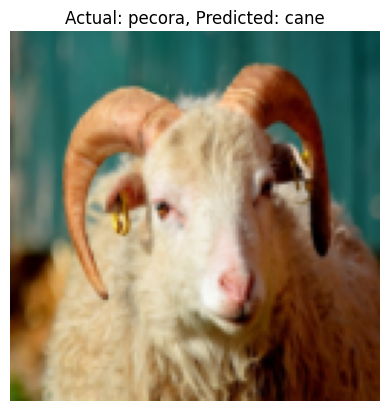

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize test images and predictions
def visualize_predictions(model, test_loader, n=5):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    images_shown = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for i in range(len(images)):
                if images_shown == n:
                    return
                plt.imshow(images[i].cpu().permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Unnormalize image
                plt.title(f"Actual: {dataset.classes[labels[i]]}, Predicted: {dataset.classes[preds[i]]}")
                plt.axis("off")
                plt.show()
                images_shown += 1

# Visualize the first 10 test predictions
visualize_predictions(model, test_loader, n=10)


Plot ROC Curve

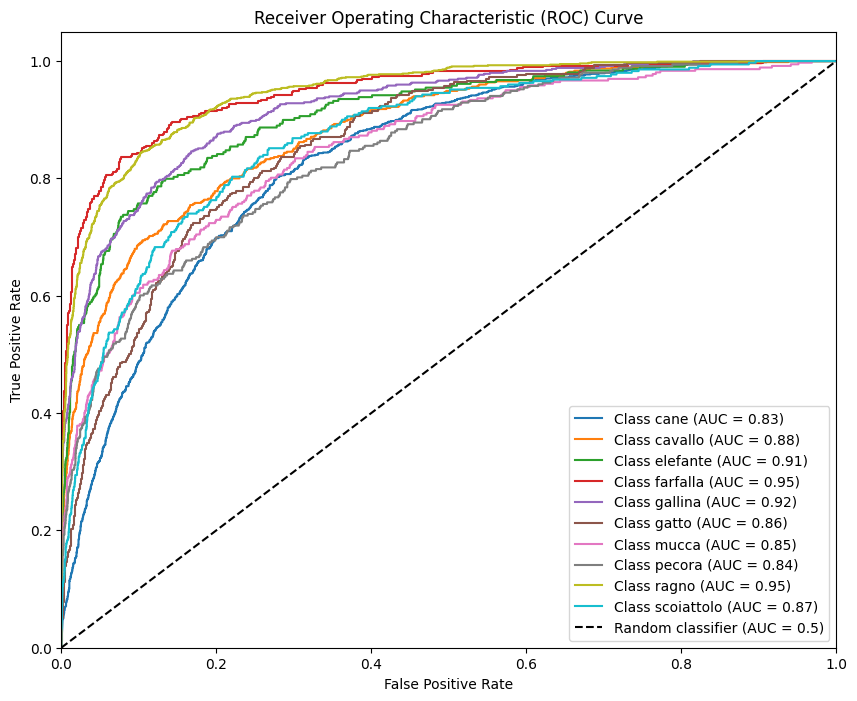

In [ ]:
import torch
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Function to calculate and plot ROC curve
def plot_roc_curve(model, test_loader, n_classes=10):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Initialize arrays to store true labels and predicted probabilities
    all_labels = []
    all_preds_prob = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Get the predicted probabilities (not just the max)
            softmax_outputs = torch.softmax(outputs, dim=1)  # Get probabilities for each class
            all_preds_prob.extend(softmax_outputs.cpu().numpy())  # Store predictions
            all_labels.extend(labels.cpu().numpy())  # Store true labels

    # Convert labels to binary format (One-vs-Rest encoding)
    all_labels_bin = label_binarize(all_labels, classes=list(range(n_classes)))

    # Calculate ROC and AUC for each class
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], [prob[i] for prob in all_preds_prob])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {dataset.classes[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label="Random classifier (AUC = 0.5)")  # Random chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for the model
plot_roc_curve(model, test_loader, n_classes=10)


# **Pase 2: Parameter Limitation**

Preprocessing

In [ ]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Paths and parameters
dataset_path = "raw-img"
batch_size = 32
img_size = 128  # Resize images to 128x128, matching model input size

# Transforms
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# Load dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split into train (70%), val (10%), test (20%)
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

# DataLoaders
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

print(f"Train: {len(train_set)}, Validation: {len(val_set)}, Test: {len(test_set)}")


Train: 18325, Validation: 2617, Test: 5237


CNN Model Design

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ModifiedCNN(nn.Module):
    def __init__(self):
        super(ModifiedCNN, self).__init__()

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)  # Output: 64x128x128
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)                  # Downsample by 2
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1) # Output: 128x64x64
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1) # Output: 128x32x32

        # # Batch normalization
        # self.bn1 = nn.BatchNorm2d(64)
        # self.bn2 = nn.BatchNorm2d(128)
        # self.bn3 = nn.BatchNorm2d(128)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 16 * 16, 32)
        self.fc2 = nn.Linear(32, 10)  # 10 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model2 = ModifiedCNN()
print(model2)


ModifiedCNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=8192, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)


Training and Testing

Epoch 1/10, Loss: 1.8620, Accuracy: 34.36%
Epoch 2/10, Loss: 1.4468, Accuracy: 50.55%
Epoch 3/10, Loss: 1.2362, Accuracy: 57.82%
Epoch 4/10, Loss: 1.0927, Accuracy: 63.07%
Epoch 5/10, Loss: 0.9682, Accuracy: 67.36%
Epoch 6/10, Loss: 0.8618, Accuracy: 70.92%
Epoch 7/10, Loss: 0.7529, Accuracy: 74.83%
Epoch 8/10, Loss: 0.6539, Accuracy: 78.13%
Epoch 9/10, Loss: 0.5595, Accuracy: 81.34%
Epoch 10/10, Loss: 0.4683, Accuracy: 84.41%


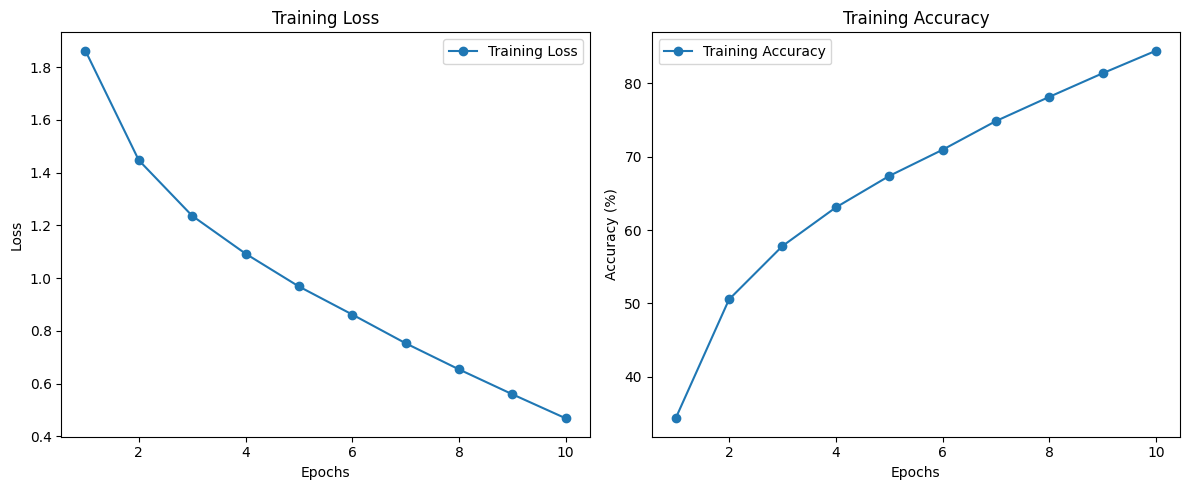

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Hyperparameters
learning_rate = 0.001
epochs = 10

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=learning_rate)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)

train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model2.train()
    train_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model2(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # Predictions and accuracy calculation
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate accuracy
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

# Plotting training loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Model Evaluation on Test Set

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate on the test set
def evaluate_model2(model2, test_loader):
    model2.eval()  # Set model2 to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model2.to(device)

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model2(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    return all_labels, all_preds

all_labels, all_preds = evaluate_model2(model2, test_loader)


Test Accuracy: 60.32%


Calculate Precision, Recall, and F1 Score

Classification Report:
              precision    recall  f1-score   support

        cane       0.59      0.63      0.61       989
     cavallo       0.64      0.58      0.61       530
    elefante       0.49      0.42      0.45       291
    farfalla       0.74      0.69      0.71       427
     gallina       0.77      0.64      0.70       606
       gatto       0.46      0.30      0.36       360
       mucca       0.40      0.57      0.47       369
      pecora       0.41      0.57      0.48       353
       ragno       0.76      0.77      0.76       962
  scoiattolo       0.52      0.48      0.50       350

    accuracy                           0.60      5237
   macro avg       0.58      0.56      0.57      5237
weighted avg       0.61      0.60      0.60      5237



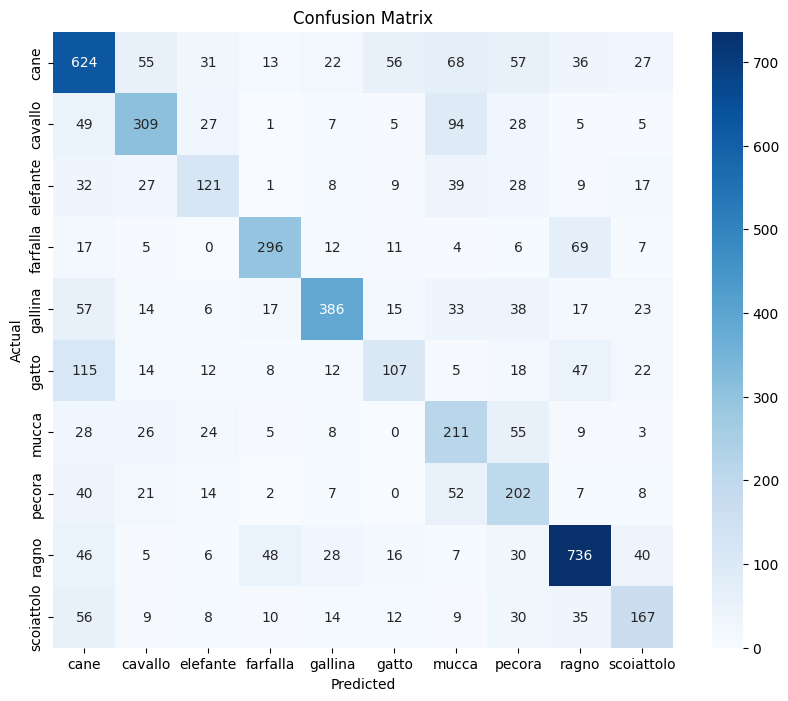

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
print("Classification Report:")
report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Visualize Test Predictions

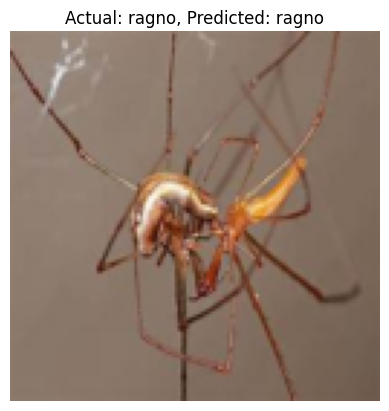

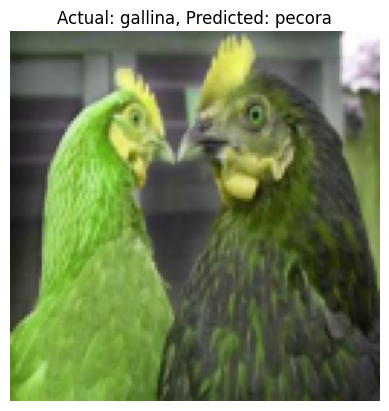

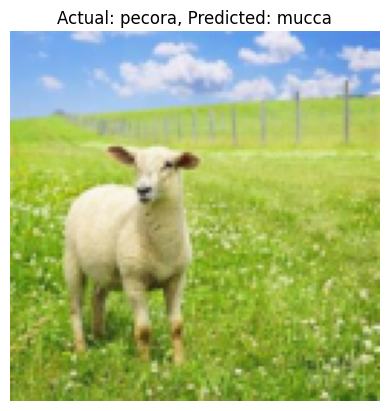

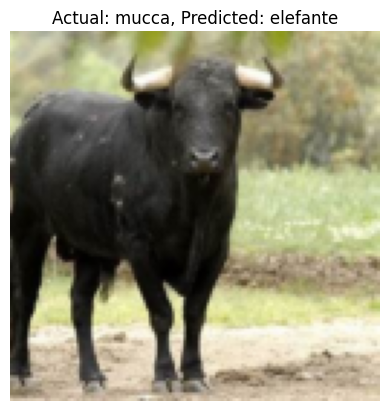

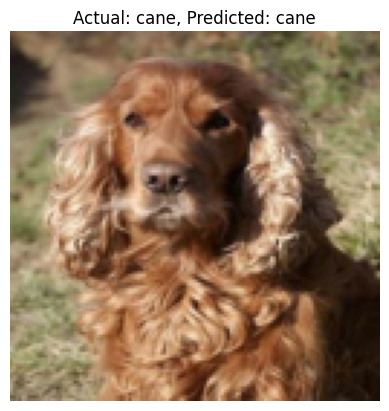

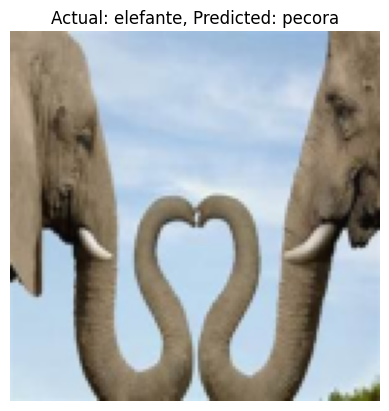

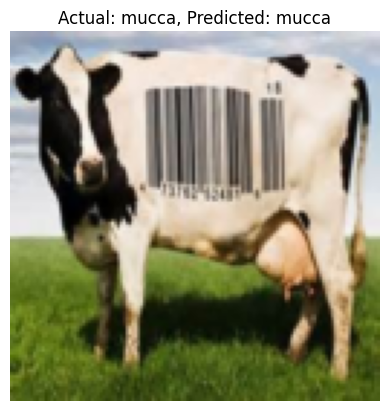

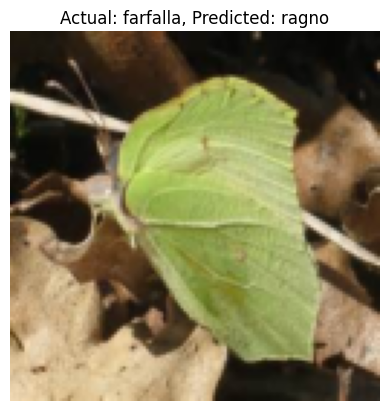

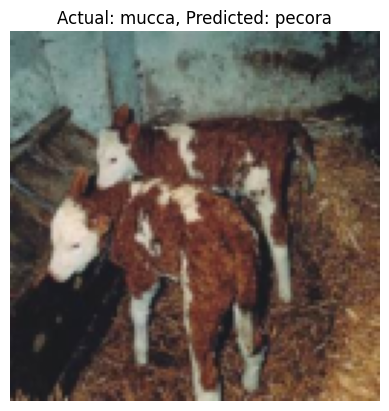

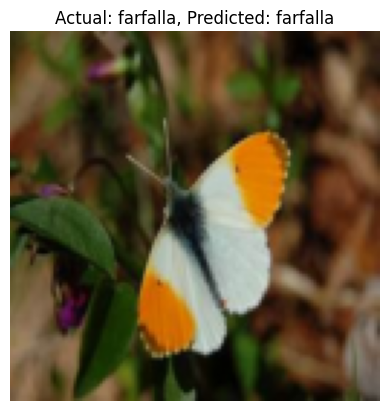

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize test images and predictions
def visualize_predictions(model2, test_loader, n=5):
    model2.eval()
    model2.to(device)

    images_shown = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model2(images)
            _, preds = torch.max(outputs, 1)

            for i in range(len(images)):
                if images_shown == n:
                    return
                plt.imshow(images[i].cpu().permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Unnormalize image
                plt.title(f"Actual: {dataset.classes[labels[i]]}, Predicted: {dataset.classes[preds[i]]}")
                plt.axis("off")
                plt.show()
                images_shown += 1

# Visualize the first 10 test predictions
visualize_predictions(model2, test_loader, n=10)


Plot ROC Curve

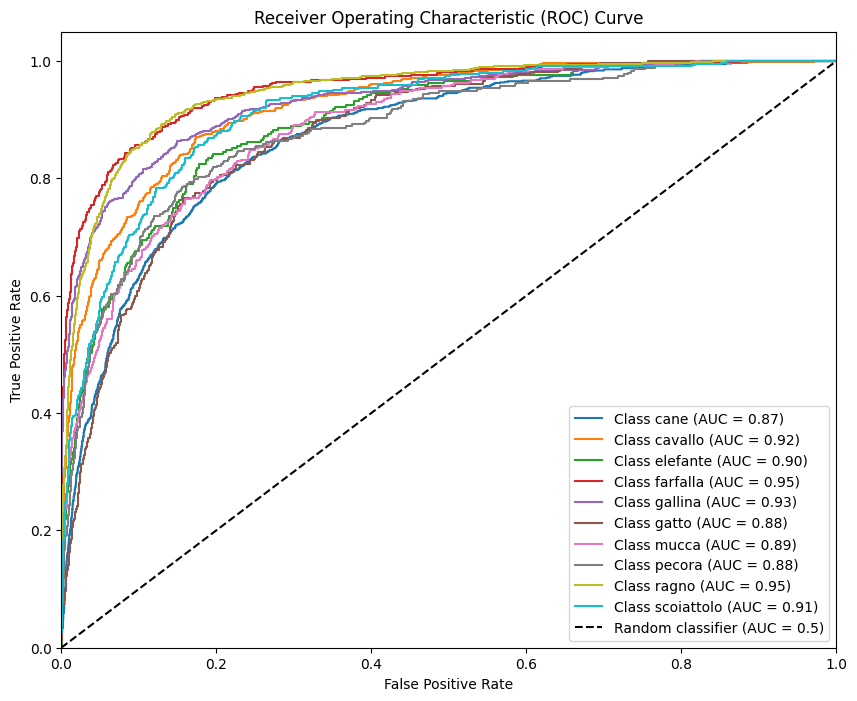

In [ ]:
import torch
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Function to calculate and plot ROC curve
def plot_roc_curve(model2, test_loader, n_classes=10):
    model2.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model2.to(device)

    # Initialize arrays to store true labels and predicted probabilities
    all_labels = []
    all_preds_prob = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model2(images)

            # Get the predicted probabilities (not just the max)
            softmax_outputs = torch.softmax(outputs, dim=1)  # Get probabilities for each class
            all_preds_prob.extend(softmax_outputs.cpu().numpy())  # Store predictions
            all_labels.extend(labels.cpu().numpy())  # Store true labels

    # Convert labels to binary format (One-vs-Rest encoding)
    all_labels_bin = label_binarize(all_labels, classes=list(range(n_classes)))

    # Calculate ROC and AUC for each class
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], [prob[i] for prob in all_preds_prob])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {dataset.classes[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label="Random classifier (AUC = 0.5)")  # Random chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for the model2
plot_roc_curve(model2, test_loader, n_classes=10)


# **Phase 3: Overfitting Prevent**

Data Augmentation

In [4]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split


# Define data augmentation and transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize all images to 128x128
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.ToTensor()
])

# Load the dataset
dataset_path = "raw-img"
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)


# Set random seed for reproducibility
torch.manual_seed(42)

# Split into train (70%), val (10%), test (20%)
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# Print dataset sizes
print(f"Total dataset size: {len(dataset)}")
print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Testing set size: {len(test_set)}")


Total dataset size: 26179
Training set size: 18325
Validation set size: 2617
Testing set size: 5237


Regularization Techniques

In [5]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.4)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

model = CNN(10).to(device)



Use Weight Decay

In [6]:
# Loss and Optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Training with Augmentation and Regularization

In [7]:
train_losses = []
train_accuracies = []

for epoch in range(10):  # Example: 10 epochs
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # Predictions and accuracy
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_accuracy = 100 * correct / total
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch + 1}, Loss: {train_loss / len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")


Epoch 1, Loss: 1.7603, Accuracy: 39.15%
Epoch 2, Loss: 1.5037, Accuracy: 47.81%
Epoch 3, Loss: 1.3917, Accuracy: 51.86%
Epoch 4, Loss: 1.3150, Accuracy: 54.98%
Epoch 5, Loss: 1.2519, Accuracy: 57.13%
Epoch 6, Loss: 1.2027, Accuracy: 58.95%
Epoch 7, Loss: 1.1626, Accuracy: 60.14%
Epoch 8, Loss: 1.1287, Accuracy: 61.06%
Epoch 9, Loss: 1.0925, Accuracy: 62.67%
Epoch 10, Loss: 1.0680, Accuracy: 63.54%


Plotting

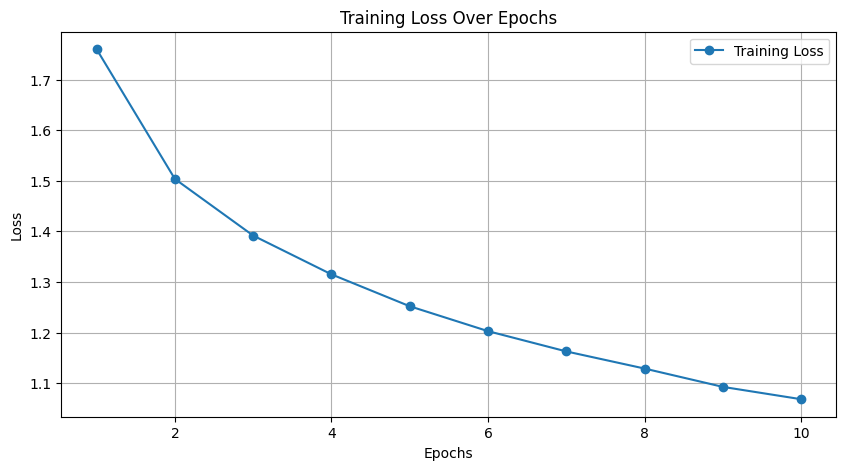

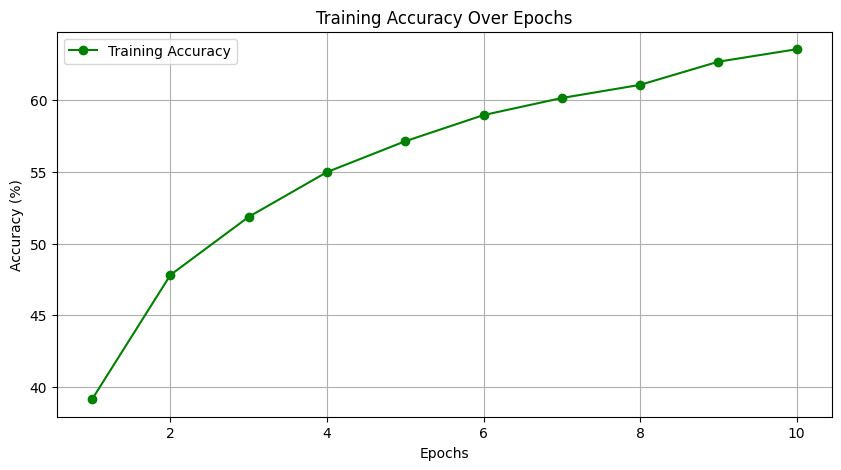

In [12]:
import matplotlib.pyplot as plt

# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Training Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', marker='o', color='green')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid()
plt.show()


Model Evaluation on Test Set

In [13]:
from sklearn.metrics import accuracy_score

# Evaluate on the test set
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    return all_labels, all_preds

all_labels, all_preds = evaluate_model(model, test_loader)


Test Accuracy: 62.80%


Calculate Precision, Recall, and F1 Score



Classification Report:
              precision    recall  f1-score   support

        cane       0.54      0.69      0.61       993
     cavallo       0.79      0.48      0.60       530
    elefante       0.73      0.47      0.57       298
    farfalla       0.87      0.63      0.73       429
     gallina       0.82      0.65      0.72       601
       gatto       0.36      0.59      0.44       340
       mucca       0.54      0.43      0.48       359
      pecora       0.67      0.40      0.50       361
       ragno       0.67      0.92      0.77       945
  scoiattolo       0.62      0.48      0.54       381

    accuracy                           0.63      5237
   macro avg       0.66      0.57      0.60      5237
weighted avg       0.66      0.63      0.63      5237



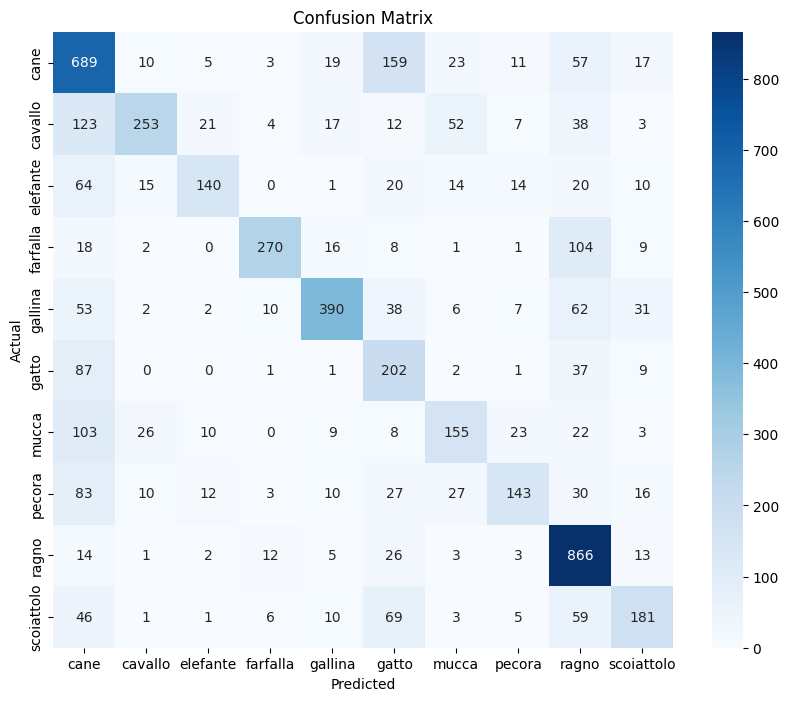

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
print("Classification Report:")
report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Visualize Test Predictions

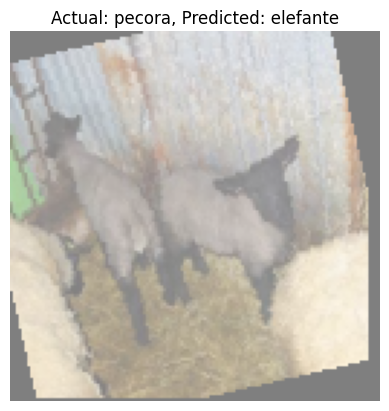

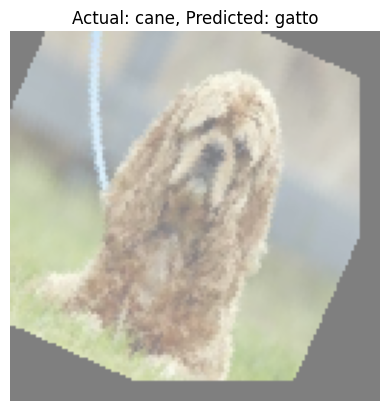

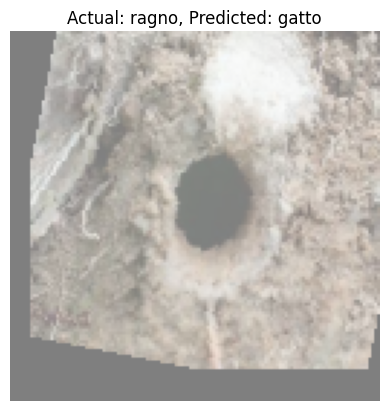

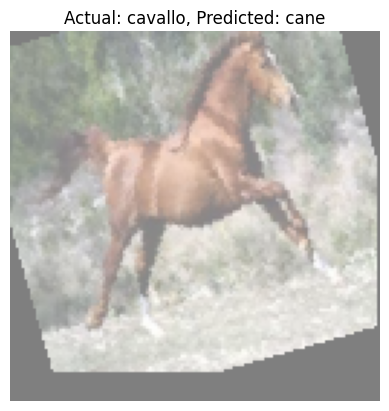

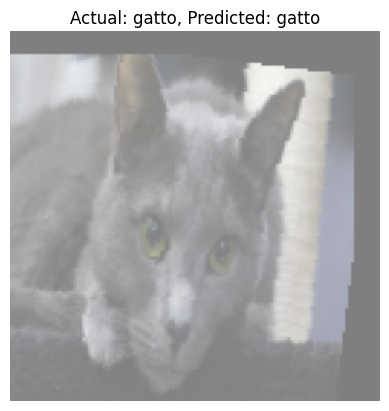

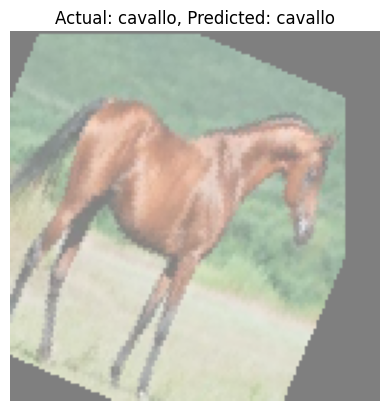

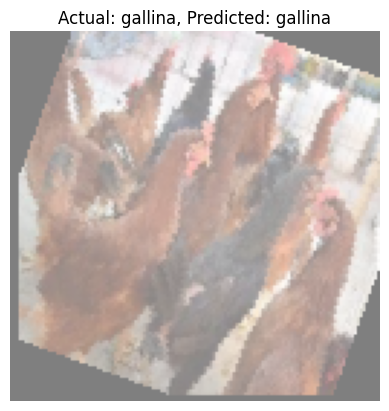

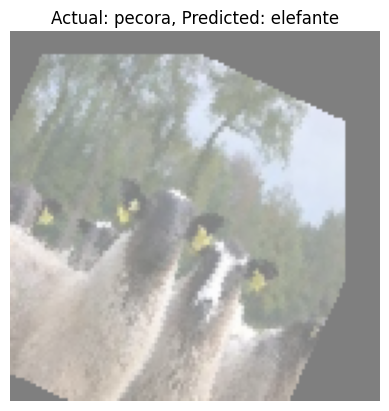

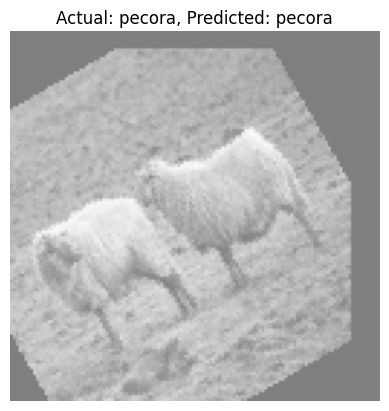

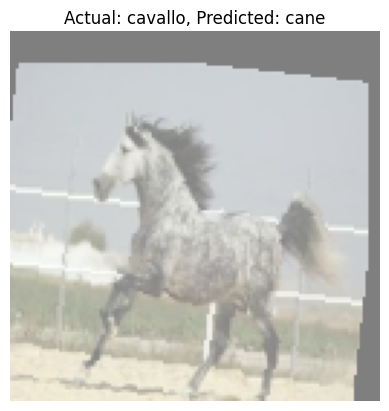

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize test images and predictions
def visualize_predictions(model, test_loader, n=5):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    images_shown = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for i in range(len(images)):
                if images_shown == n:
                    return
                plt.imshow(images[i].cpu().permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Unnormalize image
                plt.title(f"Actual: {dataset.classes[labels[i]]}, Predicted: {dataset.classes[preds[i]]}")
                plt.axis("off")
                plt.show()
                images_shown += 1

# Visualize the first 10 test predictions
visualize_predictions(model, test_loader, n=10)


Plot ROC Curve

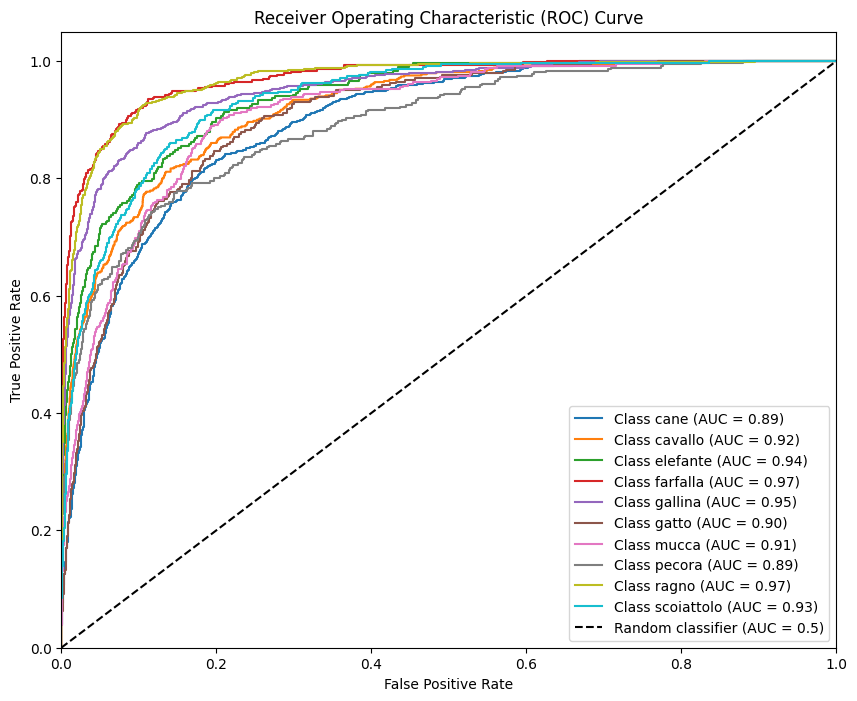

In [17]:
import torch
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Function to calculate and plot ROC curve
def plot_roc_curve(model, test_loader, n_classes=10):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Initialize arrays to store true labels and predicted probabilities
    all_labels = []
    all_preds_prob = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Get the predicted probabilities (not just the max)
            softmax_outputs = torch.softmax(outputs, dim=1)  # Get probabilities for each class
            all_preds_prob.extend(softmax_outputs.cpu().numpy())  # Store predictions
            all_labels.extend(labels.cpu().numpy())  # Store true labels

    # Convert labels to binary format (One-vs-Rest encoding)
    all_labels_bin = label_binarize(all_labels, classes=list(range(n_classes)))

    # Calculate ROC and AUC for each class
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], [prob[i] for prob in all_preds_prob])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {dataset.classes[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label="Random classifier (AUC = 0.5)")  # Random chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for the model
plot_roc_curve(model, test_loader, n_classes=10)